# Predicting Style Probability by Painting Features

Author: Yangyu Wang, Gio Choi, Avi Oberoi

Date: 02/11/2025

## Table of Contents

1. [Data Preprocessing](#Data-Preprocessing)
2. [Tree-based Model](#Tree-based-Model:-Random-Forest)
3. [Linear Model](#Linear-Model)
4. [Model Comparison & Results](#Model-Comparison-&-Results)

## Data Preprocessing

In [2]:
#Avi, Please add your code here

## EDA

1. Processing data

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [117]:
painting_feature = pd.read_csv("data/artwork_with_clip_features.csv")

In [119]:
def string_to_array(s):
    '''
    Change the string-like array into numpy.array
    Parameter:
        s: string to change with an array structure
    Output: array
    '''
    return np.fromstring(s.strip("[]"), sep=" ").tolist()

painting_feature['Feature_array'] = painting_feature['Feature'].apply(string_to_array)

In [22]:
print(painting_feature['Feature_array'][0][0])

0.035522


In [5]:
len(set(painting_feature["Style_Category"]))

16

In [120]:
painting_feature.head()

,Artwork_ID,Artist_name,Year,image_n,Style_Category,Feature,Feature_array
0,9,a-y-jackson,1919,46467,Impressionism & Post-Impressionism,[ 3.5522e-02 -5.0446e-02 3.7323e-02 1.8173e-...,"[0.035522, -0.050446, 0.037323, 0.018173, -0.0..."
1,10,a-y-jackson,1918,73382,Art Nouveau & Deco,[-2.8248e-03 -2.7283e-02 2.2278e-02 1.8936e-...,"[-0.0028248, -0.027283, 0.022278, 0.018936, -0..."
2,11,a-y-jackson,1951,64112,Impressionism & Post-Impressionism,[ 3.4515e-02 -7.7515e-03 3.0270e-03 1.6342e-...,"[0.034515, -0.0077515, 0.003027, 0.016342, -0...."
3,12,a-y-jackson,1920,2173,Impressionism & Post-Impressionism,[-1.0796e-02 7.4120e-03 1.1635e-02 4.5807e-...,"[-0.010796, 0.007412, 0.011635, 0.045807, 0.00..."
4,13,a-y-jackson,1933,74330,Art Nouveau & Deco,[-1.3092e-02 -1.0653e-03 5.2887e-02 -4.5700e-...,"[-0.013092, -0.0010653, 0.052887, -0.00457, -0..."


Here we do not directly encode the Style_Category, because for tree-based and linear model, y should be encoded in different ways. Detailed processing on the y, please check each part.

2. Visualization

In [ ]:
# Avi, could you add some dimension detection on features here?

In [ ]:
# i will add my R stuff here

3. Split on training and testing dataset

Because of the imbalanced structure of our dataset, we sample 800 for each categories to train the model and 200 to test.

In [50]:
train_samples = []
test_samples = []

# Sample 500 instances per category
for style, group in painting_feature.groupby('Style_Category'):
    train_sample, test_sample = train_test_split(group, train_size=800, test_size=200, random_state=42, stratify=group['Style_Category'])
    print(style, len(group))
    
    train_samples.append(train_sample)
    test_samples.append(test_sample)

balanced_train_df = pd.concat(train_samples)
balanced_test_df = pd.concat(test_samples)


Abstract & Geometric Art 14217
Academic & 19th Century Art 33771
Art Nouveau & Deco 6144
Conceptual & Minimalist Art 2719
Cubism & Futurism 5709
Dada & Surrealism 7638
Expressionism & Fauvism 15717
Impressionism & Post-Impressionism 24896
Kinetic & Optical Art 3725
Modern & Postmodern Art 3381
Photorealism & Realism 3235
Political & Social Art 2292
Pop Art & Op Art 5821
Renaissance & Baroque 28405
Symbolism & Fantasy 7391
Traditional & Regional Art 6369


In [51]:
len(balanced_train_df)

12800

## Tree-based Model: Random Forest

1. Data processing

We chose label encoder here, for tree-based do not require any additional encoding to deal with tasks.

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
labelencoder = LabelEncoder()

In [103]:
X_train = np.vstack(balanced_train_df["Feature_array"])
y_train = np.array(balanced_train_df['Style_Category'])

X_test = np.vstack(balanced_test_df["Feature_array"])
y_test = np.array(balanced_test_df['Style_Category'])

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (12800, 512), y_train shape: (12800,)
X_test shape: (3200, 512), y_test shape: (3200,)


2. Random Forest

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
rfc_1 = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rfc_1.fit(X_train, y_train)
np.round(rfc_1.score(X_test,y_test),3)

0.502

3. Model Evaluation

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [107]:
y_pred_rfc_1 = rfc_1.predict(X_test)
y_probs_rfc_1 = rfc_1.predict_proba(X_test)  # Shape: (n_samples, n_classes)
confusion_matrix(y_test, y_pred_rfc_1, labels=rfc_1.classes_)

array([[ 87,   0,   2,  18,  10,   9,   5,   0,  47,   2,   5,   2,   7,
          0,   0,   6],
       [  1, 112,  10,   0,   2,   0,   0,  29,   0,   3,   3,   6,   0,
         27,   7,   0],
       [  2,  20,  92,   6,   4,   8,   8,  17,   1,   2,   5,  11,   2,
          6,  13,   3],
       [ 20,   0,   2, 130,   0,   1,   0,   0,   9,   5,   3,   8,  18,
          0,   1,   3],
       [  9,   0,   4,   0, 141,  13,  11,   7,   2,   1,   0,   6,   3,
          0,   2,   1],
       [  8,   2,   8,  11,  33,  74,   8,   2,   9,   5,   2,   8,   8,
          2,  16,   4],
       [  3,   9,  10,   3,  35,   9,  57,  27,   9,  14,   1,   2,   4,
          0,   8,   9],
       [  0,  25,   6,   1,   0,   3,   7, 144,   0,   0,   5,   1,   0,
          2,   5,   1],
       [ 30,   0,   0,  11,   9,   5,   0,   1, 130,   2,   1,   0,  10,
          0,   0,   1],
       [  3,   4,   2,  11,   0,   7,   6,   9,  19,  91,  10,  13,   9,
          3,   7,   6],
       [  1,  13,   4,  10,   

In [108]:
print(classification_report(y_test, y_pred_rfc_1, zero_division=np.nan))

                                    precision    recall  f1-score   support

          Abstract & Geometric Art       0.46      0.43      0.45       200
       Academic & 19th Century Art       0.47      0.56      0.51       200
                Art Nouveau & Deco       0.49      0.46      0.47       200
       Conceptual & Minimalist Art       0.53      0.65      0.59       200
                 Cubism & Futurism       0.53      0.70      0.61       200
                 Dada & Surrealism       0.42      0.37      0.39       200
           Expressionism & Fauvism       0.38      0.28      0.32       200
Impressionism & Post-Impressionism       0.51      0.72      0.60       200
             Kinetic & Optical Art       0.48      0.65      0.55       200
           Modern & Postmodern Art       0.50      0.46      0.48       200
            Photorealism & Realism       0.50      0.36      0.42       200
            Political & Social Art       0.48      0.46      0.47       200
           

In [109]:
roc_score = roc_auc_score(y_test, y_probs_rfc_1, multi_class='ovo')
roc_score

0.89542984375

In [111]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=rfc_1.classes_)

roc_per_class = roc_auc_score(y_test_bin, y_probs_rfc_1, average=None)

for style, roc in zip(rfc_1.classes_, roc_per_class):
    print("ROC-AUC for", style, ":", roc)

ROC-AUC for Abstract & Geometric Art : 0.8992175000000001
ROC-AUC for Academic & 19th Century Art : 0.9222108333333333
ROC-AUC for Art Nouveau & Deco : 0.8974783333333334
ROC-AUC for Conceptual & Minimalist Art : 0.9404508333333333
ROC-AUC for Cubism & Futurism : 0.9324625
ROC-AUC for Dada & Surrealism : 0.8759983333333333
ROC-AUC for Expressionism & Fauvism : 0.8251141666666666
ROC-AUC for Impressionism & Post-Impressionism : 0.9401774999999999
ROC-AUC for Kinetic & Optical Art : 0.9507083333333334
ROC-AUC for Modern & Postmodern Art : 0.8414941666666667
ROC-AUC for Photorealism & Realism : 0.8736308333333332
ROC-AUC for Political & Social Art : 0.8865025
ROC-AUC for Pop Art & Op Art : 0.8442733333333333
ROC-AUC for Renaissance & Baroque : 0.9874491666666667
ROC-AUC for Symbolism & Fantasy : 0.83826
ROC-AUC for Traditional & Regional Art : 0.8714491666666668


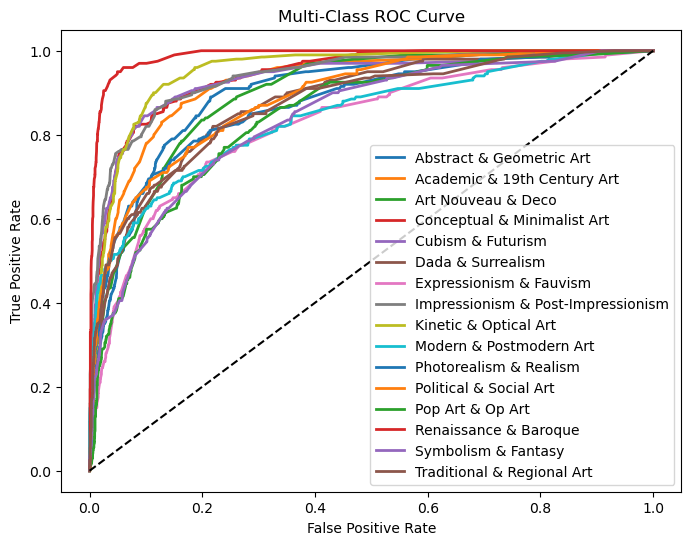

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from itertools import cycle

# Compute ROC curve for each class
n_classes = len(rfc_1.classes_)

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs_rfc_1[:, i])
    plt.plot(fpr, tpr, lw=2, label=rfc_1.classes_[i])

plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()


In [71]:
# fine tune random forest models

0.502

## Linear Model

## Model-Comparison-&-Results